1. Import The Libraries

In [2]:
#import the libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#for the predictions:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

#for the evaluation:
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler


2. Load the Dataset

In [60]:
df = pd.read_csv("Walmart_Store_sales.csv")

In [64]:
#check top few records of the dataset
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [68]:
#check the last few records of the dataset
df.tail()


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667
6434,45,26-10-2012,760281.43,0,58.85,3.882,192.308899,8.667


3. Exploratory data analysis

In [71]:
# check detailed summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [119]:
# Analyze the distribution of the dataset
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week,Day,Dayofweek
count,2565.000000,2.565000e+03,2565.000000,2565.000000,2565.000000,2565.000000,2565.000000,2565.000000,2565.000000,2565.000000,2565.000000,2565.000000
mean,23.000000,1.059872e+06,0.105263,59.585864,3.329579,171.386349,8.022267,2010.929825,6.561404,25.157895,504.491228,2.929825
std,12.989706,5.573831e+05,0.306952,19.069276,0.461985,39.293112,1.878158,0.791769,3.459797,15.108178,303.019793,2.101868
min,1.000000,2.099862e+05,0.000000,-2.060000,2.513000,126.085452,3.879000,2010.000000,1.000000,1.000000,0.000000,0.000000
25%,12.000000,5.700695e+05,0.000000,45.260000,2.868000,131.586613,6.908000,2010.000000,4.000000,13.000000,272.000000,1.000000
50%,23.000000,9.813452e+05,0.000000,61.100000,3.417000,182.598306,7.907000,2011.000000,6.000000,23.000000,483.000000,3.000000
75%,34.000000,1.450733e+06,0.000000,74.570000,3.702000,212.512605,8.622000,2012.000000,10.000000,40.000000,754.000000,5.000000
max,45.000000,2.752122e+06,1.000000,100.070000,4.468000,227.169392,14.313000,2012.000000,12.000000,50.000000,1065.000000,6.000000


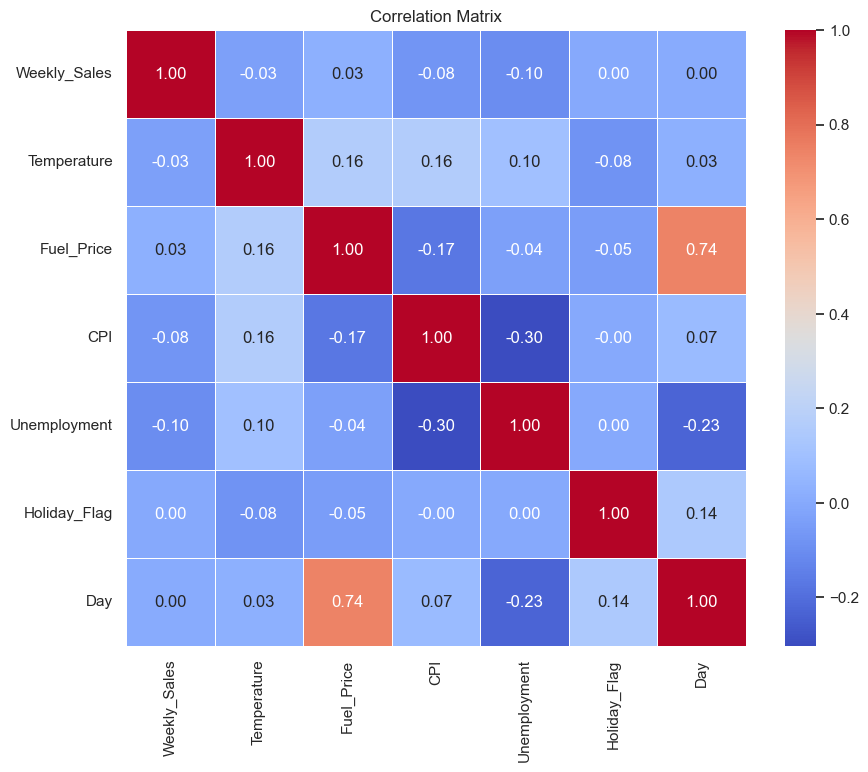

In [115]:
# Calculate the correlation matrix
corr_matrix = df[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Holiday_Flag', 'Day']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [131]:
# i reload it so that it works :/
df = pd.read_csv("Walmart_Store_sales.csv")
# Force Date column to datetime, coerce errors to NaT
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Drop rows where date couldn't be parsed
df = df.dropna(subset=['Date'])

# Extract date features (safe now!)
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week.astype(int)
df['Day'] = (df['Date'] - df['Date'].min()).dt.days
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week,Day
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,17,112
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,48,326
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,18,113
5,1,2010-12-03,1439541.59,0,57.79,2.667,211.380643,8.106,2010,12,48,327
8,1,2010-02-04,1594968.28,0,62.27,2.719,210.820450,7.808,2010,2,5,25


  4.Transition between the data preparation phase and the model training phase:


In [157]:
# Define features and target variable
features = ['Store', 'Day', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Holiday_Flag'] + \
           [col for col in df.columns if 'Holiday_Name_' in col]

X = df[features]
y = df['Weekly_Sales']

# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


   5.training phase:


linear regression VS RandomForestRegressor

In [203]:
# Initialize and train the model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr.predict(X_test)

# Evaluate the model
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression MSE: {mse_lr:.2f}")
print(f"Linear Regression R²: {r2_lr:.2f}")

Linear Regression MSE: 285080807943.85
Linear Regression R²: 0.12


In [201]:
# Initialize and train the model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest MSE: {mse_rf:.2f}")
print(f"Random Forest R²: {r2_rf:.2f}")


Random Forest MSE: 9986549104.42
Random Forest R²: 0.97


In [183]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, 30],
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 30, 'n_estimators': 100}


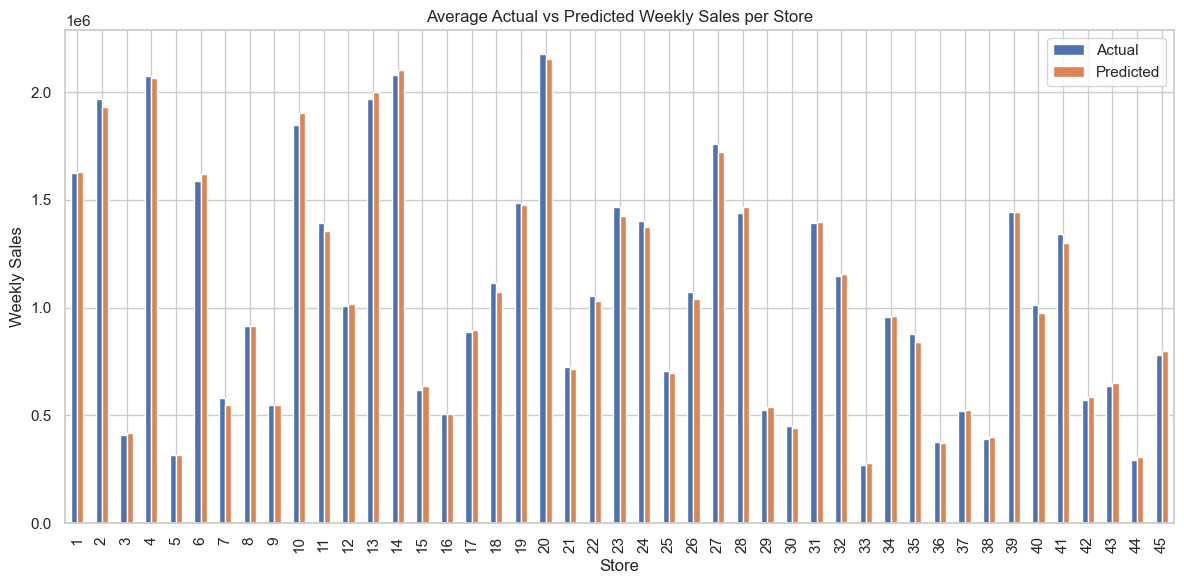

In [184]:
# Create a DataFrame with predictions and actuals
results_df = X_test.copy()
results_df['Actual_Sales'] = y_test
results_df['Predicted_Sales'] = y_pred_rf

# Group by store and get average actual & predicted sales
store_comparison = results_df.groupby('Store')[['Actual_Sales', 'Predicted_Sales']].mean()

# Plot
store_comparison.plot(kind='bar', figsize=(12, 6))
plt.title("Average Actual vs Predicted Weekly Sales per Store")
plt.xlabel("Store")
plt.ylabel("Weekly Sales")
plt.legend(["Actual", "Predicted"])
plt.tight_layout()
plt.show()

In [195]:
importances = rf.feature_importances_
feature_importance = pd.DataFrame({'Feature': features, 'Importance': importances})
print(feature_importance.sort_values(by='Importance', ascending=False))

        Feature  Importance
0         Store    0.727977
4           CPI    0.160186
5  Unemployment    0.082908
2   Temperature    0.012478
3    Fuel_Price    0.010662
1           Day    0.005164
6  Holiday_Flag    0.000625


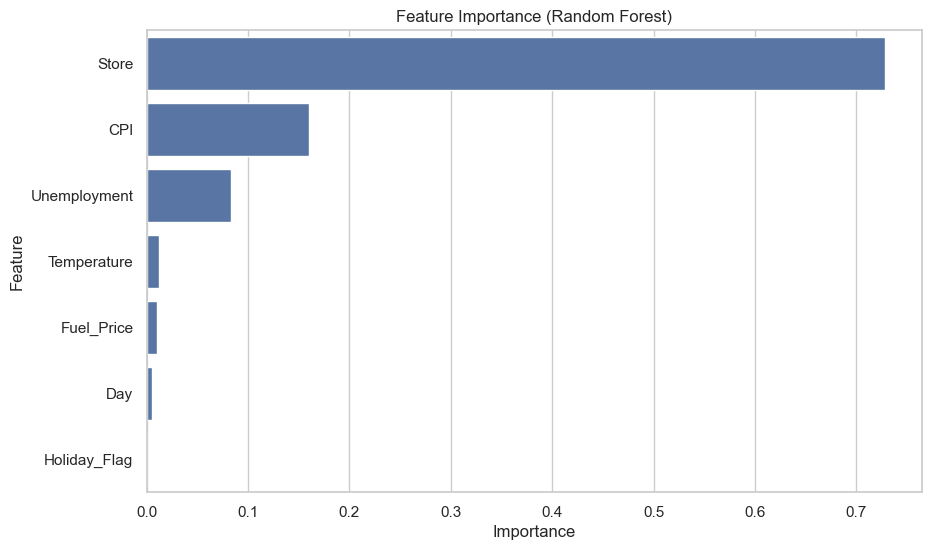

In [197]:
# Plot feature importances from Random Forest
importances = rf.feature_importances_
feature_names = features

# Create a DataFrame for easier plotting
feat_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_importance_df)
plt.title('Feature Importance (Random Forest)')
plt.show()


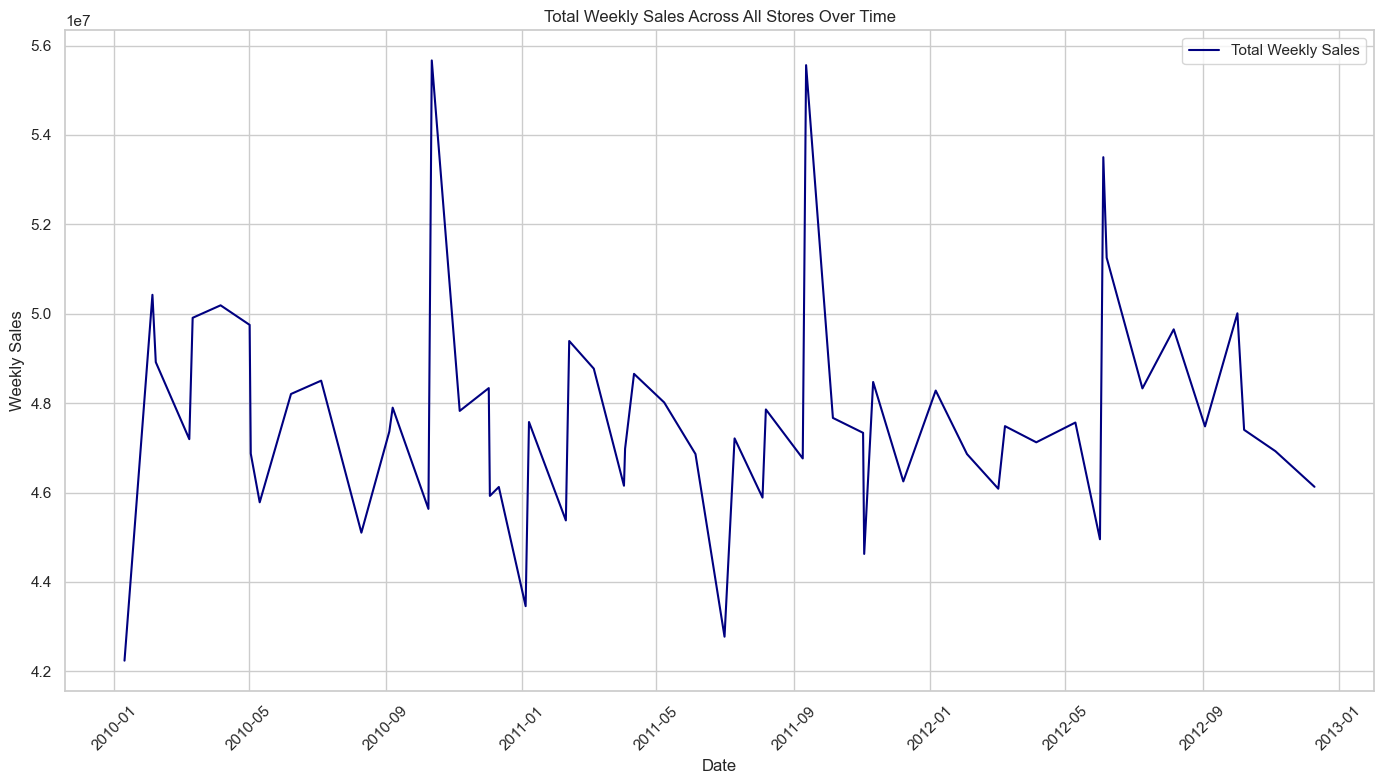

In [199]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by date across all stores
total_sales_by_date = df.groupby('Date')['Weekly_Sales'].sum().reset_index()

# Plot total sales over time
plt.figure(figsize=(14, 8))
sns.lineplot(x='Date', y='Weekly_Sales', data=total_sales_by_date, label="Total Weekly Sales", color='navy')
plt.title('Total Weekly Sales Across All Stores Over Time')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


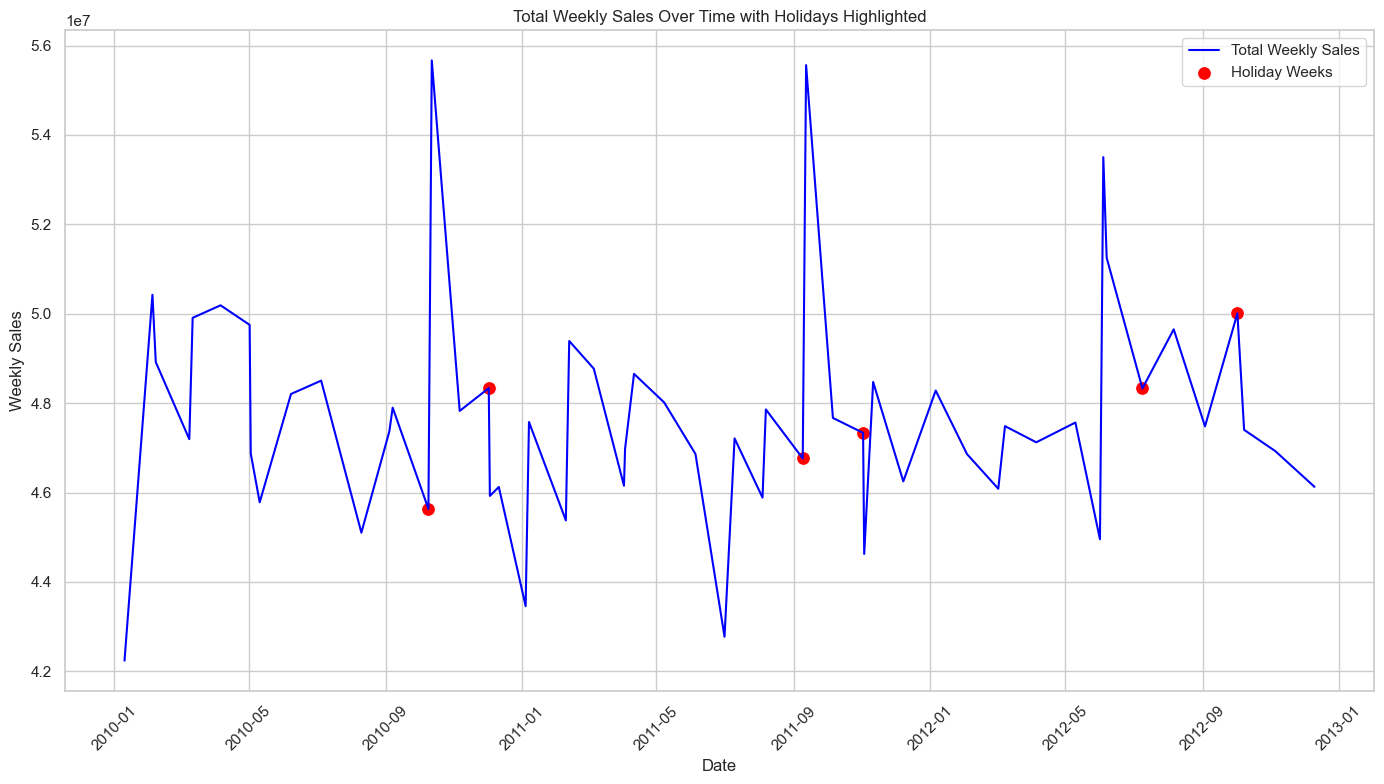

In [188]:
# Get holiday weeks across all stores
holiday_weeks = df[df['Holiday_Flag'] == 1]
holiday_sales_by_date = holiday_weeks.groupby('Date')['Weekly_Sales'].sum().reset_index()

# Plot with holiday highlights
plt.figure(figsize=(14, 8))
sns.lineplot(x='Date', y='Weekly_Sales', data=total_sales_by_date, label="Total Weekly Sales", color='blue')
sns.scatterplot(x='Date', y='Weekly_Sales', data=holiday_sales_by_date, color='red', label='Holiday Weeks', s=100)
plt.title('Total Weekly Sales Over Time with Holidays Highlighted')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


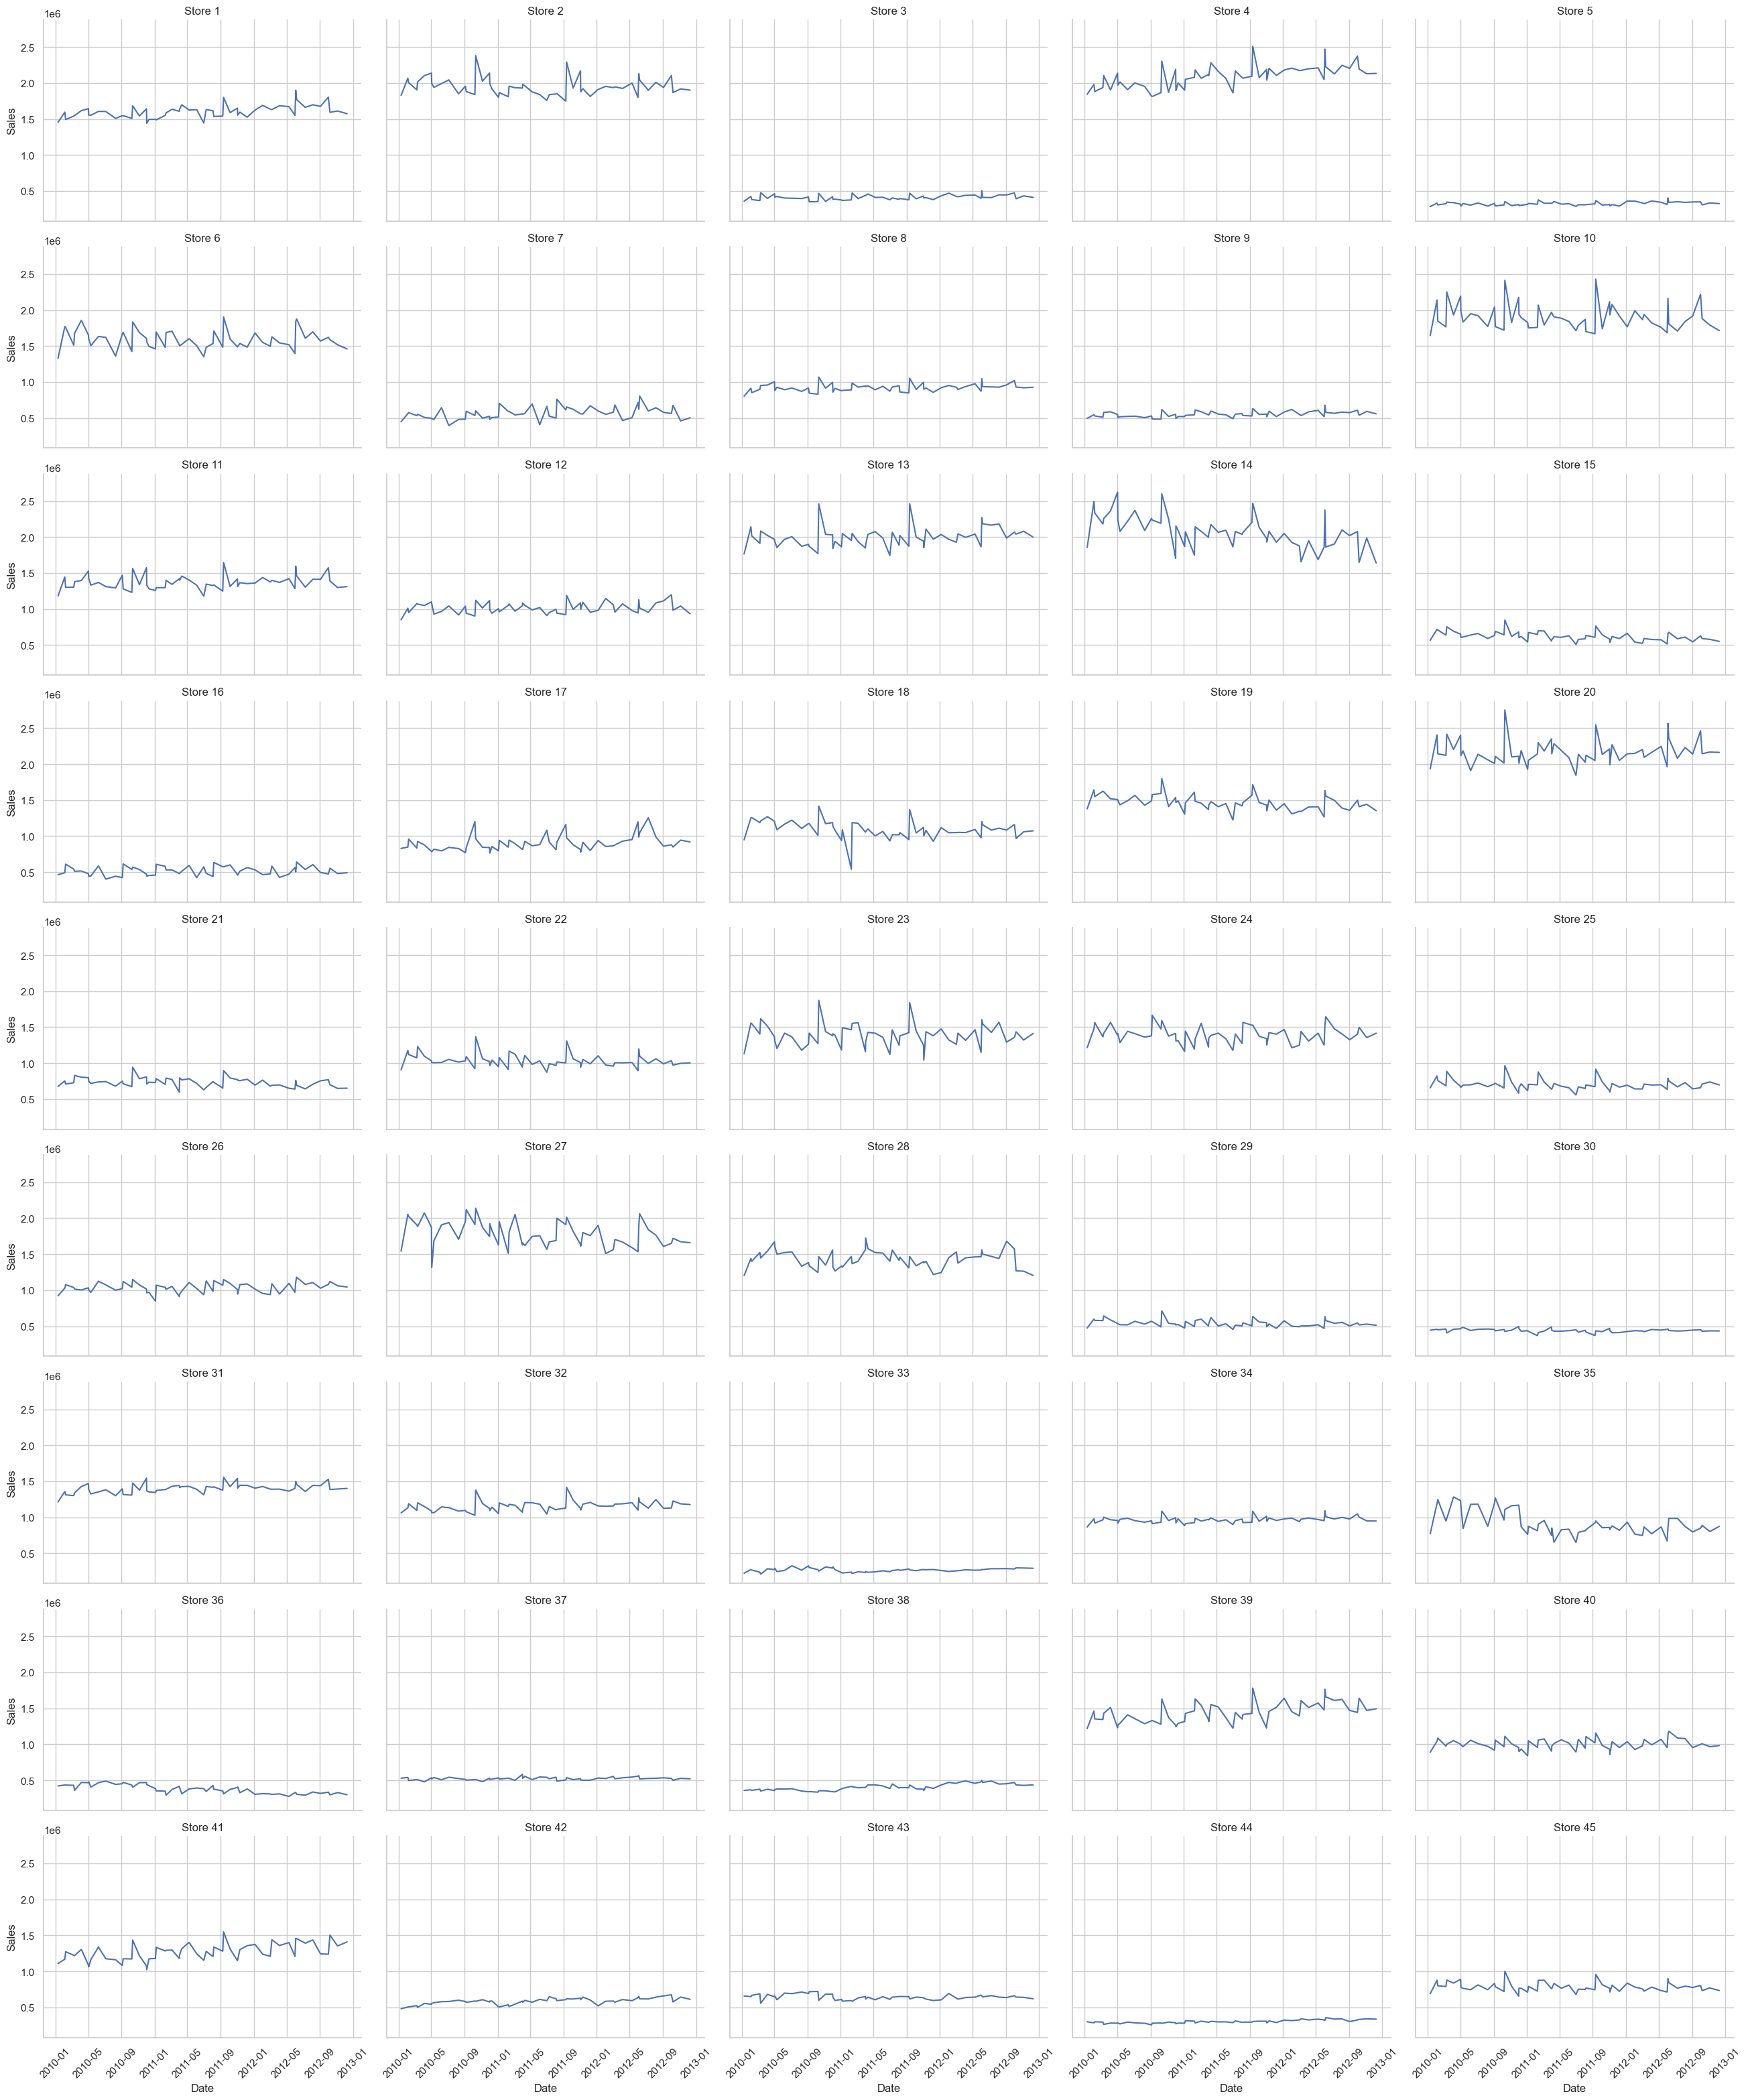

In [193]:
g = sns.FacetGrid(df, col='Store', col_wrap=5, height=3.5, aspect=1.5)
g.map_dataframe(sns.lineplot, x='Date', y='Weekly_Sales')
g.set_titles("Store {col_name}")
g.set_axis_labels("Date", "Sales")
for ax in g.axes.flatten():
    for label in ax.get_xticklabels():
        label.set_rotation(45)
plt.tight_layout()
plt.show()
